<a href="https://colab.research.google.com/github/CashaEl/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_6%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 6강 - 데이터 전처리 1

### 6-1 데이터 훑어보기

In [32]:
!apt-get update -qq
!apt-get install fonts-nanum -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

print('현재 설정된 폰트:', plt.rcParams['font.family'])

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
현재 설정된 폰트: ['NanumGothic']


In [1]:
import pandas as pd
import numpy as np

data = {
    'name': ['김민수', '이지영', '박준호', '최서연', '정도윤'],
    'age': [25, 30, 28, 22, 35],
    'city': ['서울', '부산', '인천', '서울', '대전'],
    'score': [90, 85, 95, 80, np.nan]
}
df = pd.DataFrame(data)

# 데이터 측정
#print(df.describe())

# 모든 데이터 타입 측정
#df.describe(include='all')

# 수치형 데이터 측정
#df.describe(include=[np.number])

# 범주형 데이터 측정
#df.describe(include=['object'])

# 특정 열 분석
df['score'].describe()


,score
count,4.000000
mean,87.500000
std,6.454972
min,80.000000
25%,83.750000
50%,87.500000
75%,91.250000
max,95.000000



### 6-2 DataFrame 열 선택 및 **조작**

In [2]:
import pandas as pd

data = {
    "이름": ["김철수", "이영희", "박민수", "최지훈", "정소희"],
    "학년": [1, 2, 3, 4, 2],
    "학점": [4.2, 3.8, 4.5, 3.9, 3.5],
    "학과": ["컴퓨터공학", "경영학", "전자공학", "의학", "심리학"],
    "동아리": ["프로그래밍", "독서토론", "로봇공학", "봉사활동", "음악감상"]
}
df = pd.DataFrame(data)

# 특정 열 선택
selected_col = df[['이름', '학과', '학점']]
#selected_col

# DataFrame 열순서 변경
reordered_cols = df[['학과','이름','학년','학점','동아리']]
reordered_cols

# DataFrame 열이름 변경
df_renamed = df.rename(columns={'이름': '학생명', '학점': 'y', '동아리': '과외활동'})
df_renamed

,학생명,학년,y,학과,과외활동
0,김철수,1,4.2,컴퓨터공학,프로그래밍
1,이영희,2,3.8,경영학,독서토론
2,박민수,3,4.5,전자공학,로봇공학
3,최지훈,4,3.9,의학,봉사활동
4,정소희,2,3.5,심리학,음악감상


### 6-3 DataFrame 행 선택

In [3]:
import pandas as pd

data = {
    "이름": ["김철수", "이영희", "박민수", "최지훈", "정소희"],
    "학년": [1, 2, 3, 4, 2],
    "학점": [4.2, 3.8, 4.5, 3.9, 3.5],
    "학과": ["컴퓨터공학", "경영학", "전자공학", "의학", "심리학"],
    "동아리": ["프로그래밍", "독서토론", "로봇공학", "봉사활동", "음악감상"]
}

#DataFrame 인덱스 지정
df = pd.DataFrame(data)
df = df.set_index('이름')
df

#DataFrame 행 선택
df.loc['김철수']
df.loc[['김철수', '이영희']]
df.loc['김철수':'박민수']

#DataFrame 위치 기반 행 선택
df.iloc[1]
df.iloc[2,3]
df.iloc[1:3]

#DataFrame 조건 기반 선택
df.loc[[True, False, True, False, False]]
print(df[['학점', '학년']])
df.loc[df['학점'] >= 4.0]
df[df['학년'] == 2]
df[(df['학년'] == 2) & (df['학점'] >= 3.7)]

      학점  학년
이름          
김철수  4.2   1
이영희  3.8   2
박민수  4.5   3
최지훈  3.9   4
정소희  3.5   2


,학년,학점,학과,동아리
이름,,,,
이영희,2,3.8,경영학,독서토론


### 6-4 DataFrame 정렬

In [4]:
import pandas as pd

data = {
    "이름": ["김철수", "이영희", "박민수", "최지훈", "정소희"],
    "학년": [1, 2, 3, 4, 2],
    "학점": [4.2, 3.8, 4.5, 3.9, 3.5],
    "학과": ["컴퓨터공학", "경영학", "전자공학", "의학", "심리학"],
    "동아리": ["프로그래밍", "독서토론", "로봇공학", "봉사활동", "음악감상"]
}

#DataFrame 인덱스 지정
df = pd.DataFrame(data).set_index('이름')
df

#DataFrame 단일 열 오름차순, 내림차순 정렬
df.sort_values(by='학점')
df.sort_values(by='학점', ascending = False)

#DataFrame 복수 열 오름차순, 내림차순 정렬
df.sort_values(by=['학년', '학점'], ascending = [True, False])


#DataFrame 인덱스 기분 오른차순, 내림차순 정렬
df.sort_index(ascending=False)


,학년,학점,학과,동아리
이름,,,,
최지훈,4,3.9,의학,봉사활동
정소희,2,3.5,심리학,음악감상
이영희,2,3.8,경영학,독서토론
박민수,3,4.5,전자공학,로봇공학
김철수,1,4.2,컴퓨터공학,프로그래밍


## 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정

- Kaggle([https://www.kaggle.com](https://www.kaggle.com)) 회원 가입
- Kaggle 접근 토큰 생성(API 키)


### Kaggle API 키 업로드

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cashaeli","key":"c514649623fb0791c02091fc04f1117d"}'}

### Kaggle API 키 사용을 위한 Colab 환경 설정

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Kaggle 데이터셋 다운로드

In [7]:
!kaggle competitions download -c store-sales-time-series-forecasting

!unzip store-sales-time-series-forecasting.zip

  0% 0.00/21.4M [00:00<?, ?B/s]
100% 21.4M/21.4M [00:00<00:00, 1.01GB/s]
Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


### Kaggle 데이터셋 DataFrame 로드 및 살펴보기

In [8]:
import pandas as pd

# Grocery Sales 데이터 DataFrame 로드
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')
holidays_events = pd.read_csv('holidays_events.csv')


# 판매 데이터 살펴보기
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


### Kaggle 데이터셋 측정

In [9]:
# 판매 데이터 기본 통계량
train.describe()

# 매장 데이터 기본 정보
stores.head()

# 원유 가격 데이터 기본 정보
oil.head()


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [10]:
import pandas as pd
import numpy as np

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}

df = pd.DataFrame(data)

## 결측치 여부 확인
#df.isnull()
df.isna()
## 열별, 행별 결측치 개수 확인
print(df)
df.isnull().sum()
df.isnull().sum(axis=1)


## 특정 열, 행 결측치 확인
df[df.isnull().any(axis=1)]
df[df['나이'].isnull()]
## 결측치가 아닌 항목 확인
df.notnull()

## 결측치 비율
df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100

    이름    나이    도시    점수
0  김철수  25.0    서울  90.0
1  이영희  30.0  None  85.0
2  박민수   NaN    인천   NaN
3  최지훈  22.0    서울  80.0
4  정소희  35.0    대전  92.0


np.float64(15.0)

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,603 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

In [12]:

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


In [13]:

!apt-get update -qq
!apt-get install fonts-nanum -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

print('현재 설정된 폰트:', plt.rcParams['font.family'])

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
현재 설정된 폰트: ['NanumGothic']


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/lo

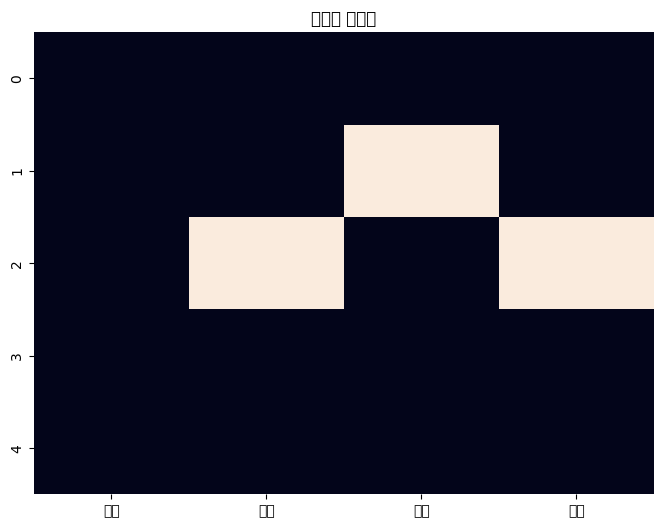

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

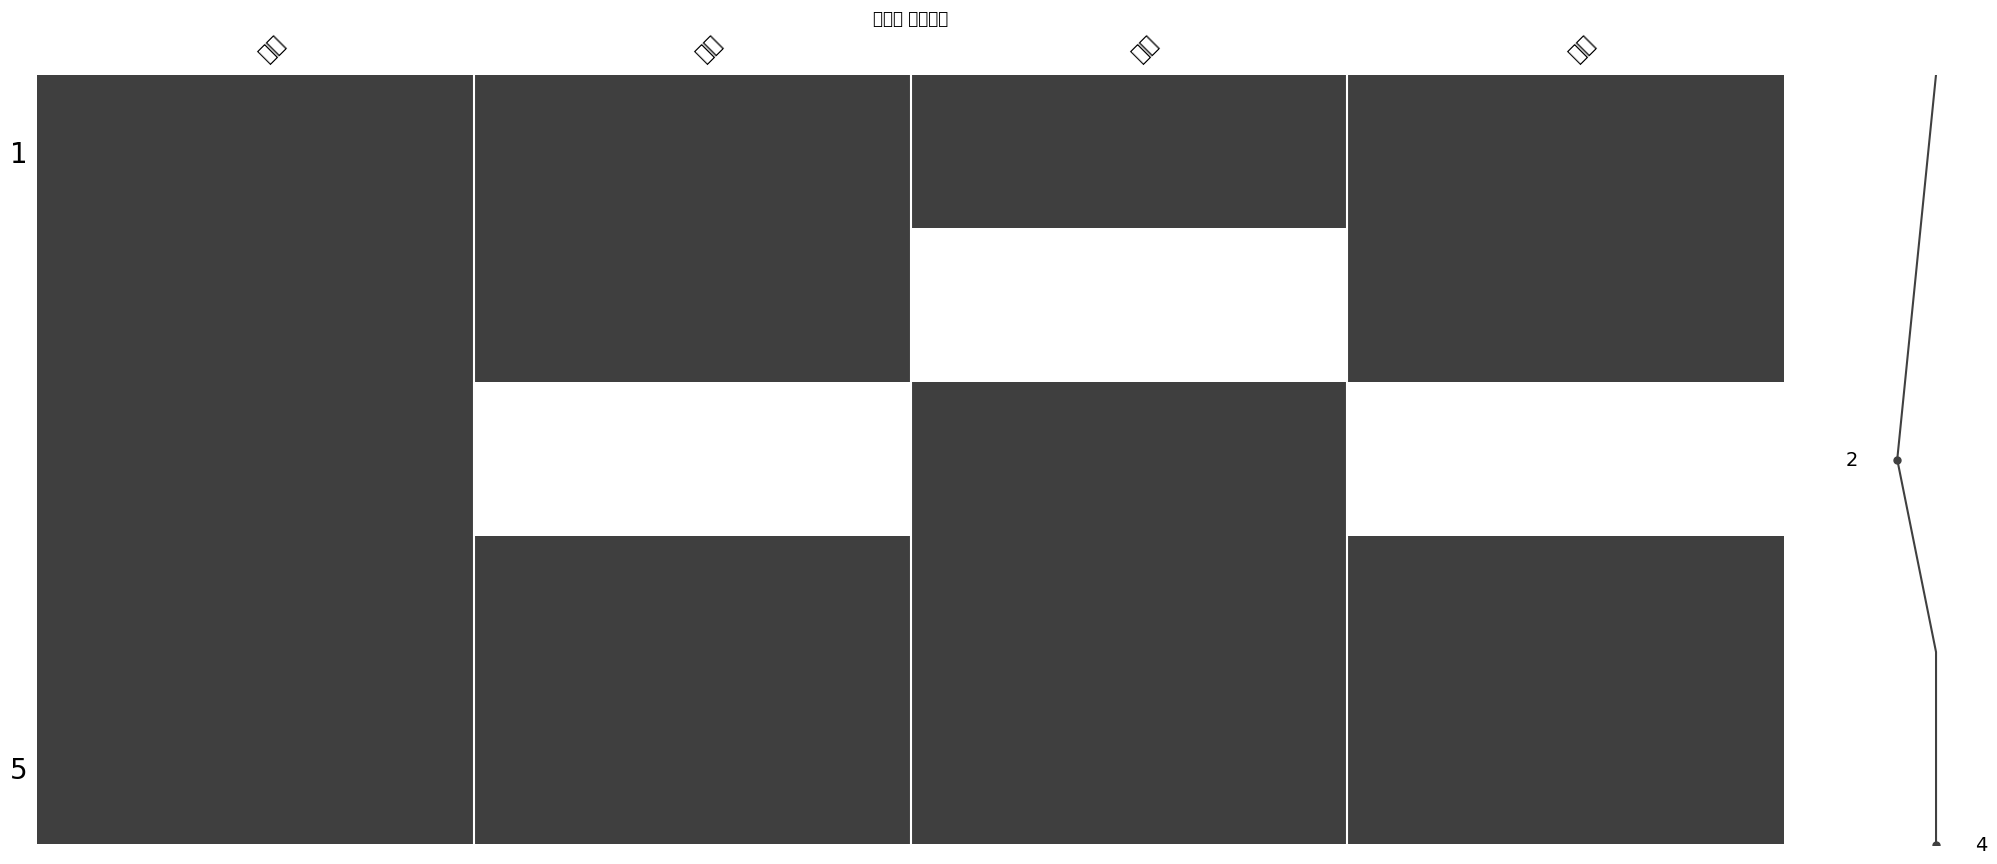

In [14]:
import numpy as np
import pandas as pd

### 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

### 결측치 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측치 히트맵")
plt.show()

### 결측치 매트릭스
msno.matrix(df)
plt.title("결측치 매트릭스")
plt.show()

In [15]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### 사분위 범위 경계값 계산
q1 = df['점수'].quantile(0.25)
q3 = df['점수'].quantile(0.75)
iqr = q3 - q1
하한값 = q1 - 1.5 * iqr
상한값 = q3 + 1.5 * iqr

### IQR 통계량 출력
print(q1)
print(q3)
print(iqr)
print(하한값)
print(상한값)

63.25
85.0
21.75
30.625
117.625


In [16]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### Z-점수 계산
점수_평균 = df['점수'].mean()
점수_표준편차 = df['점수'].std()
df['점수_Z'] = (df['점수'] - 점수_평균) / 점수_표준편차
df
### 임계값 설정 및 이상치 여부 판단
임계값  = 2
df['이상치여부'] = df['점수_Z'].abs() > 임계값
df
### 이상치 데이터 출력
df[df['이상치여부']]

### 이상치 비율 출력
df['이상치여부'].mean() * 100

np.float64(12.5)

In [17]:
import pandas as pd
import numpy as np

file_path = "raw_large_shopping_customer.csv"
df = pd.read_csv(file_path)
print(df.isnull().sum())

df_cleaned = df.dropna(thresh=df.shape[1] - 1)

### 나이, 소득 평균값 대치 및 결과 출력
df_cleaned.loc[:, ['나이', '소득']] = df_cleaned[['나이', '소득']].fillna(df_cleaned[['나이', '소득']].mean())
#df_cleaned
### 지출, 평균구매횟수 선형보간법 적용
df_cleaned.loc[:, ['지출', '평균구매횟수']] = df_cleaned[['지출','평균구매횟수']].interpolate(method='linear')

df_cleaned.to_csv("cleaned_large_shopping_customer.csv", index=False, encoding="utf-8-sig")

ID         0
나이        50
소득        50
지출        50
평균구매횟수    50
dtype: int64


In [18]:
import pandas as pd

data = {'age': [25, 30, None, 22, 35],
        'city': ['Seoul', None, 'Incheon', 'Seoul', 'Daejeon'],
        'score': [90, 85, None, 80, 92]}
df = pd.DataFrame(data)


### replace를 이용한 Seoul -> 서울
df['city'] = df['city'].replace('Seoul', '서울')
#print(df)
### replace를 이용한 None -> 미정, Incheon -> 인천
df['city'] = df['city'].replace({None:'미정', 'Incheon':'인천'})

### map을 이용한 값 변경
df = pd.DataFrame(data)
city_map = {'Seoul': '서울특별시', None: '미정', 'Incheon':'인천광역시', 'Daejeon':'대전광역시'}
df['city'] = df['city'].map(city_map)
df['age_str'] = df['age'].map(lambda x: f" {x}살" if pd.notna(x) else "알수없음")
### apply 함수를 이용한 값 변경


df['age_apply'] = df['age'].apply(lambda x: x*2 if pd.notna(x) else None)
print("\napply 함수를 이용한 값 변경:\n",df['age_apply'])

### apply 함수를 이용한 행단위 값 변경

def age_plus_score(row):
    age = row['age'] if pd.notna(row['age']) else 0
    score = row['score'] if pd.notna(row['score']) else 0
    return age + score
df['age_plus_score'] = df.apply(age_plus_score, axis=1)
print('\napply함수를 이용한 행단위 값 변경:\n', df['age_plus_score'])

### loc 인덱스를 이용한 값 변경
df.loc[df['score'] < 90, 'score'] = 90
print("\n점수가 90점 미만인 사람 90점으로 변경:\n",df)

### where 함수를 이용한 값 변경
df['age_where'] = df['age'].where(df['age'] >=30, other = 0 )
print("\nage가 30이상인 값만 유지하고 나머지를 0으로 변경\n",df['age_where'])


apply 함수를 이용한 값 변경:
 0    50.0
1    60.0
2     NaN
3    44.0
4    70.0
Name: age_apply, dtype: float64

apply함수를 이용한 행단위 값 변경:
 0    115.0
1    115.0
2      0.0
3    102.0
4    127.0
Name: age_plus_score, dtype: float64

점수가 90점 미만인 사람 90점으로 변경:
     age   city  score age_str  age_apply  age_plus_score
0  25.0  서울특별시   90.0   25.0살       50.0           115.0
1  30.0     미정   90.0   30.0살       60.0           115.0
2   NaN  인천광역시    NaN    알수없음        NaN             0.0
3  22.0  서울특별시   90.0   22.0살       44.0           102.0
4  35.0  대전광역시   92.0   35.0살       70.0           127.0

age가 30이상인 값만 유지하고 나머지를 0으로 변경
 0     0.0
1    30.0
2     0.0
3     0.0
4    35.0
Name: age_where, dtype: float64


In [19]:
date_str = ['2025-07-01', '2025-08-01', '2025-09-01']
df_date = pd.DataFrame({'date_str':date_str})

### datetime 타입 변환
df_date['date'] = pd.to_datetime(df_date['date_str'])
df_date.info()
### 날짜 데이터 분리
print(df_date['date'].dt.year)
print(df_date['date'].dt.month)
print(df_date['date'].dt.day)
print(df_date['date'].dt.day_name())

### 날짜 데이터 포멧 변경
df_date['date_formatted'] = df_date['date'].dt.strftime('%y/%m/%d')
df_date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date_str  3 non-null      object        
 1   date      3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 180.0+ bytes
0    2025
1    2025
2    2025
Name: date, dtype: int32
0    7
1    8
2    9
Name: date, dtype: int32
0    1
1    1
2    1
Name: date, dtype: int32
0    Tuesday
1     Friday
2     Monday
Name: date, dtype: object


,date_str,date,date_formatted
0,2025-07-01,2025-07-01,25/07/01
1,2025-08-01,2025-08-01,25/08/01
2,2025-09-01,2025-09-01,25/09/01


In [26]:
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [28]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 폰트 캐시 삭제
!rm -rf ~/.cache/matplotlib

In [30]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [37]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


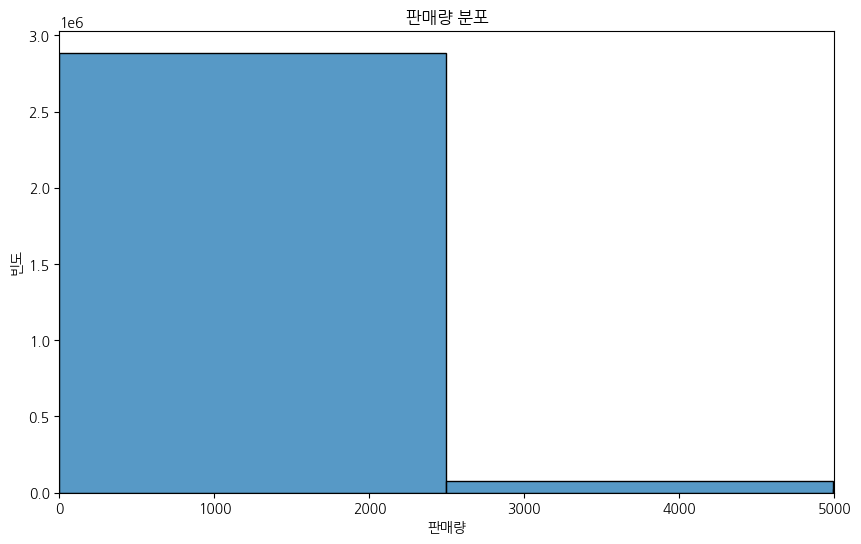

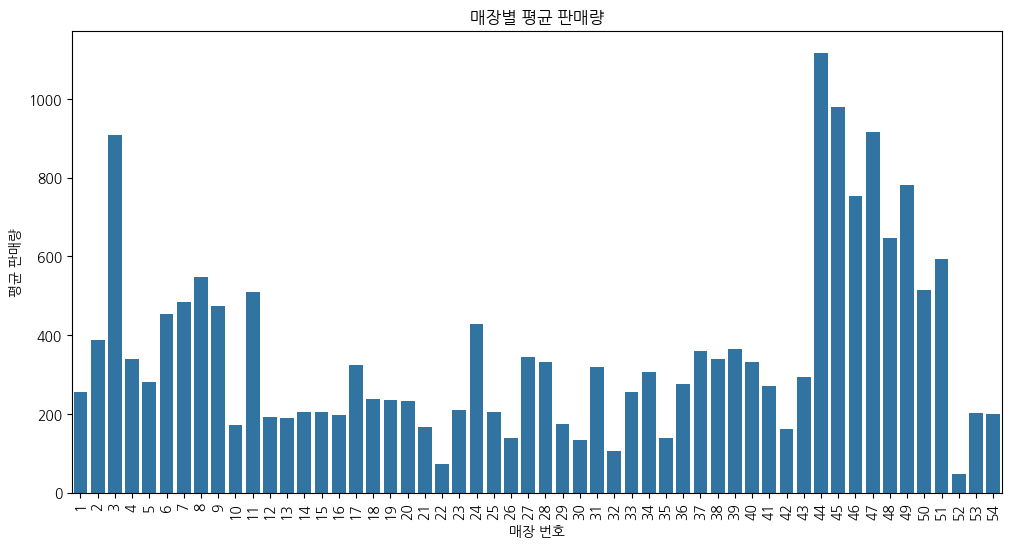

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량 분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 5000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 평균 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

In [34]:
# 1️⃣ 나눔고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq

# 2️⃣ 폰트 캐시 리셋
import matplotlib.font_manager as fm
fm._rebuild()

# 3️⃣ matplotlib 한글 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

# 4️⃣ 테스트
plt.figure(figsize=(4,3))
plt.title("한글 폰트 테스트")
plt.plot([1,2,3],[1,4,9])
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.show()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


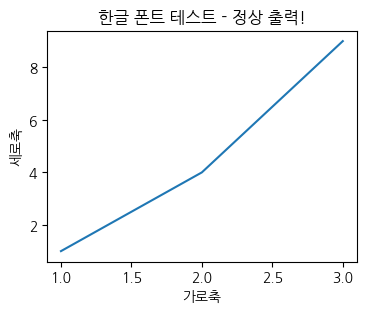

In [35]:
# 1️⃣ 나눔고딕 폰트 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 2️⃣ matplotlib 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 설치된 나눔고딕 경로 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)

# 3️⃣ 폰트 전역 설정
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

# 4️⃣ 테스트 출력
plt.figure(figsize=(4,3))
plt.title("한글 폰트 테스트 - 정상 출력!")
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.plot([1,2,3],[1,4,9])
plt.show()

In [41]:
## 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치
print(train.isnull().sum())
print(stores.isnull().sum())
print(transactions.isnull().sum())
print(oil.isnull().sum())
print(holidays_events.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
date            0
store_nbr       0
transactions    0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


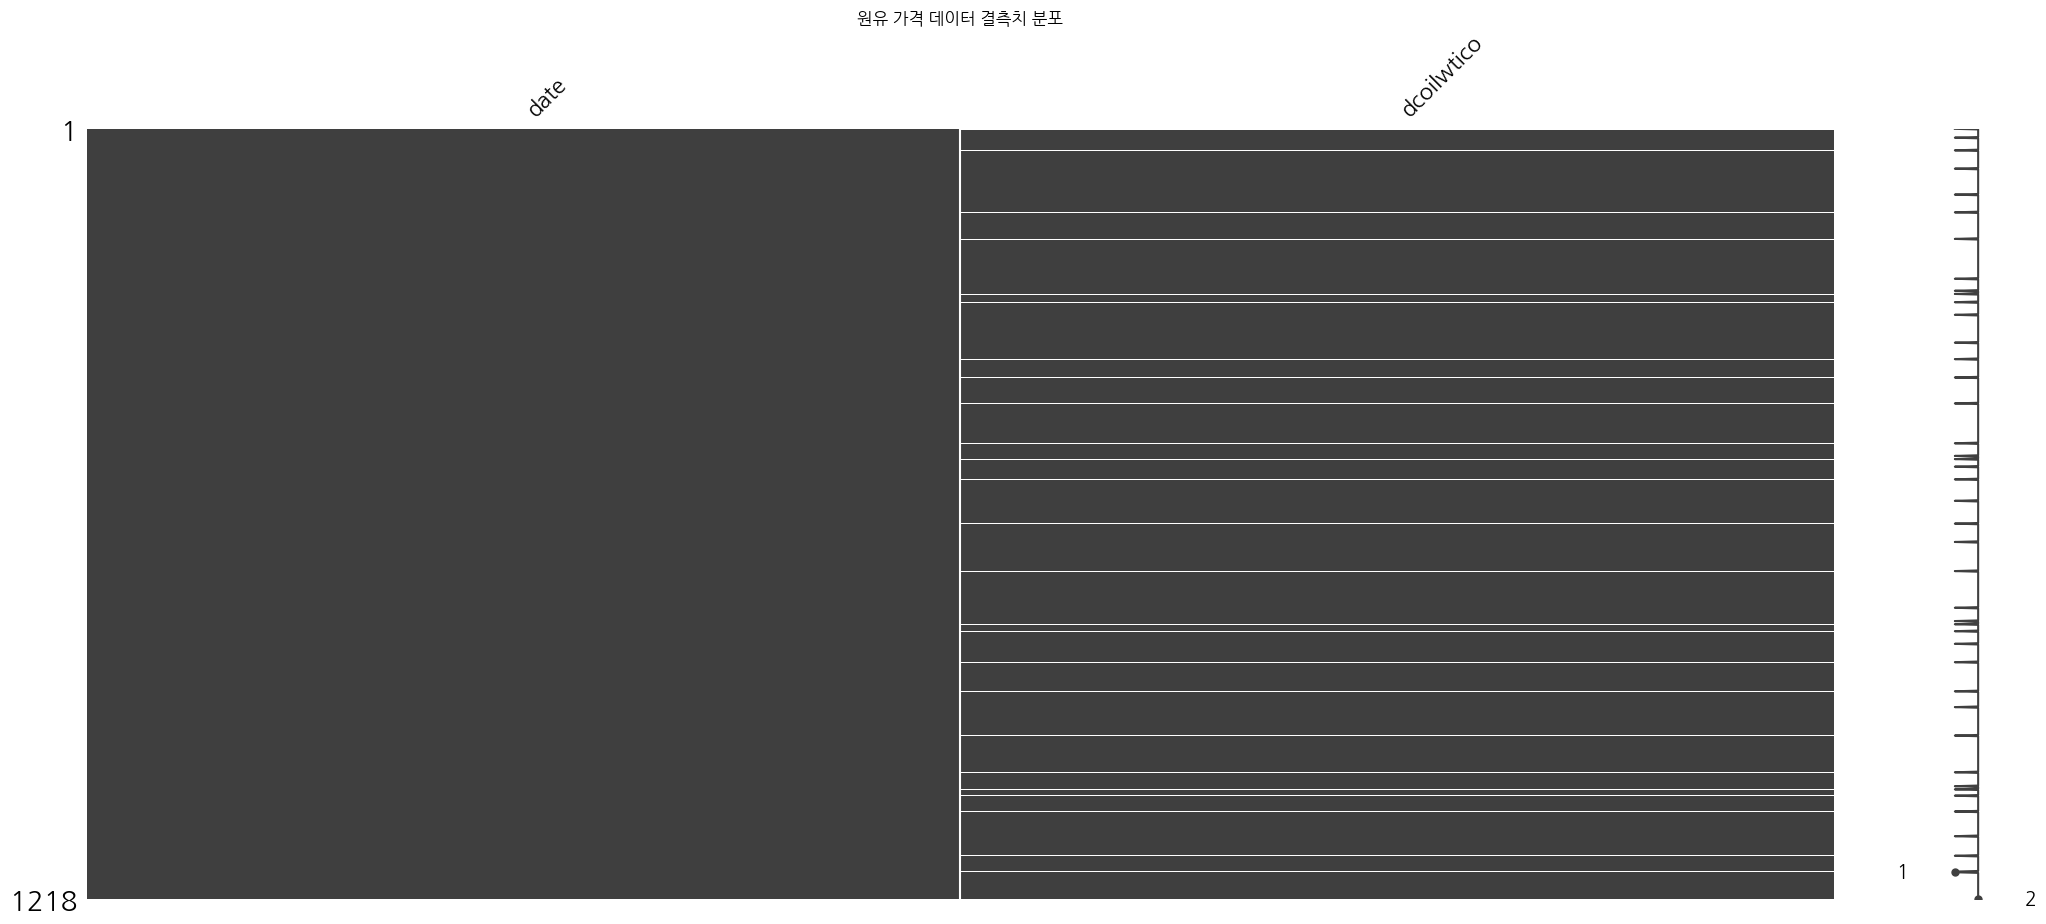

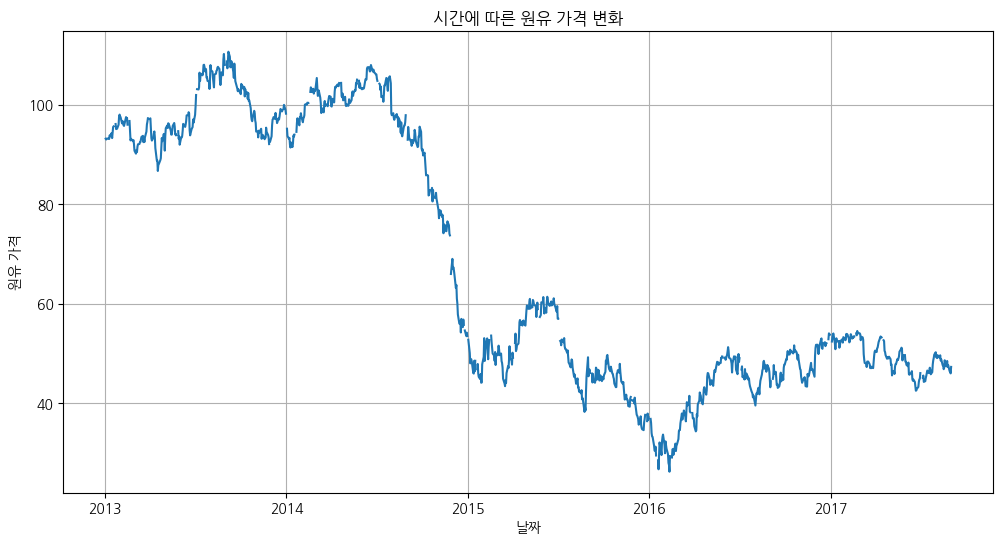

In [42]:
import missingno as msno

msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

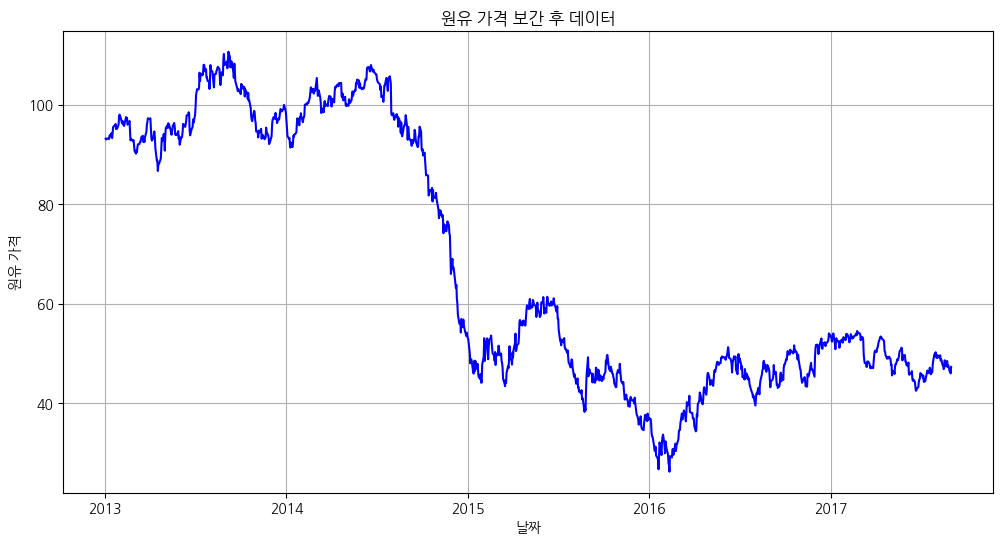

In [45]:
oil_cleaned = oil.copy()

### 선형 보간법 적용한 원유 가격 데이터
oil_cleaned['dcoilwtico'] = oil_cleaned['dcoilwtico'].interpolate(method='linear')

plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

이상치 개수: 200,274건
전체 대비 비율: 6.67%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


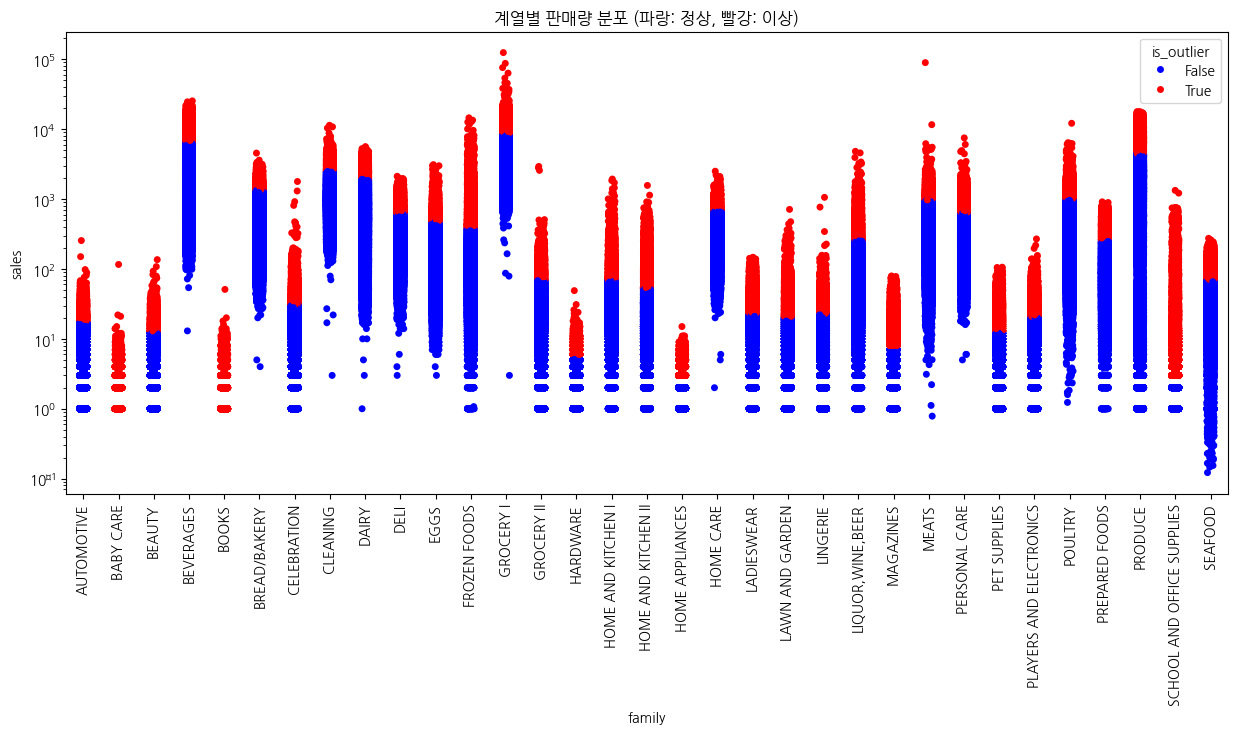

In [54]:
### 제품 계열별 판매 데이터 IQR 계산
family_bounds = train.groupby('family')['sales'].apply(
    lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))
)

### 상한값 초과 판매량 이상치 분류
train_enhanced = train.copy()
train_enhanced['upper_bound'] = train_enhanced['family'].map(family_bounds)
train_enhanced['is_outlier'] = train_enhanced['sales'] > train_enhanced['upper_bound']

total_outliers = train_enhanced['is_outlier'].sum()
total_ratio = train_enhanced['is_outlier'].mean()

print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [72]:


#print("train_enhanced 컬럼:", train_enhanced.columns)
#print("train_cleaned 컬럼:", train_cleaned.columns)

upper_bounds = family_bounds['upper_bound']

### 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned  = train.copy()
train_cleaned.loc[train_enhanced['is_outlier'], 'sales'] = train_enhanced.loc[train_enhanced['is_outlier'], 'upper_bound']


changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")



KeyError: 'upper_bound'

In [76]:
### 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경
train_cleaned['date'] = pd.to_datetime(train_cleaned['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
oil_cleaned['date'] = pd.to_datetime(oil_cleaned['date'])


train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek
### 주말, 월초, 월말 여부 추철
train_cleaned['weekend'] = train_cleaned['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
train_cleaned['is_month_start'] = train_cleaned['date'].dt.is_month_start
train_cleaned['is_month_end'] = train_cleaned['date'].dt.is_month_end

print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())

NameError: name 'train_cleaned' is not defined

In [77]:
## 요일별 평균 판매량을 계산
day_sales = train_cleaned.groupby('dayofweek')['sales'].mean().reset_index

## 요일 출력값 변경
day_sales['day_name'] = day_sales['dayofweek'].map({
    0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일',
    4: '금요일', 5: '토요일', 6: '일요일'
})

plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

NameError: name 'train_cleaned' is not defined

In [80]:
## 판매, 거래 데이터 통합
train_with_trans = pd.merge(
    train_cleaned, transactions,
    on = ['date', 'store_nbr'],
    how ='left'
)

## 매장 데이터 통합
train_with_store = pd.merge(
    train_with_trans, stores,
    on = ['store_nbr'],
    how = 'left'
)

## 원유 데이터 통합
train_final = pd.merge(
    train_with_store, oil_cleaned,
    on = 'date',
    how='left'
)


print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())

NameError: name 'train_cleaned' is not defined